<a href="https://www.kaggle.com/code/emineildesegri/churn-analysis-for-company?scriptVersionId=123666900" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Churn_Demo.txt :It is the file that contains the conversation contents of the customers' call center calls.                   

ID                              

Roaming                    

International                    

Local                           

Dropped                        

Paymethod                        

LocalPlan                     

RoamingPlan                     

Sex                             

Status                         

Children                        

Est_Income                      

Car_Owner                        
Usage                           
Age                             
Overall Satisfaction             

Churn                            
-----------------



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# pip install matplotlib --upgrade

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV,\
HalvingRandomSearchCV, cross_val_score, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
# from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("/kaggle/input/churn-for-company")
df

,ID,Roaming,International,Local,Dropped,Paymethod,LocalPlan,RoamingPlan,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,Overall Satisfaction,Churn
0,1,23.56,0.00,206.08,0,CC,Budget,Intnl_discount,F,S,1,38000.00,N,229.64,24.393333,3,Current
1,6,29.78,0.00,45.50,0,CH,FreeLocal,Standard,M,M,2,29616.00,N,75.29,49.426667,2,Current
2,8,24.81,0.00,22.44,0,CC,FreeLocal,Standard,M,M,0,19732.80,N,47.25,50.673333,3,Current
3,11,26.13,0.00,32.88,1,CC,Budget,Standard,M,S,2,96.33,N,59.01,56.473333,1,Current
4,14,5.03,0.00,23.11,0,CH,Budget,Intnl_discount,F,M,2,52004.80,N,28.14,25.140000,1,Vol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,3821,0.37,0.00,28.66,0,CC,FreeLocal,Standard,F,S,0,78851.30,N,29.04,48.373333,4,Vol
2066,3822,22.17,0.57,13.45,0,Auto,Budget,Standard,F,S,1,17540.70,Y,36.20,62.786667,1,Vol
2067,3823,28.92,0.00,45.47,0,CH,Budget,Standard,F,M,0,83891.90,Y,74.40,61.020000,4,Vol
2068,3824,26.49,0.00,12.46,0,CC,FreeLocal,Standard,F,M,2,28220.80,N,38.95,38.766667,4,Vol


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2070 entries, 0 to 2069

Data columns (total 17 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   ID                    2070 non-null   int64  

 1   Roaming               2070 non-null   float64

 2   International         2070 non-null   float64

 3   Local                 2070 non-null   float64

 4   Dropped               2070 non-null   int64  

 5   Paymethod             2070 non-null   object 

 6   LocalPlan             2070 non-null   object 

 7   RoamingPlan           2070 non-null   object 

 8   Sex                   2070 non-null   object 

 9   Status                2070 non-null   object 

 10  Children              2070 non-null   int64  

 11  Est_Income            2070 non-null   float64

 12  Car_Owner             2070 non-null   object 

 13  Usage                 2070 non-null   float64

 14  Age                   2070 non-null   float64

 15  O

In [ ]:
df.describe()

,ID,Roaming,International,Local,Dropped,Children,Est_Income,Usage,Age,Overall Satisfaction
count,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000
mean,1901.151691,16.129338,1.207295,59.080812,0.135749,1.147826,51464.262406,75.855063,42.798081,2.509662
std,1094.709118,9.866626,2.625421,57.542526,0.526189,0.843124,30796.680570,59.741635,14.883739,1.125157
min,1.000000,0.000000,0.000000,0.680000,0.000000,0.000000,96.330000,0.680000,12.326667,1.000000
25%,972.250000,8.090000,0.000000,15.200000,0.000000,0.000000,21084.700000,34.250000,30.886667,2.000000
50%,1874.000000,16.140000,0.000000,39.620000,0.000000,1.000000,55860.000000,57.110000,45.526667,2.000000
75%,2832.000000,22.990000,0.000000,87.460000,0.000000,2.000000,78000.000000,107.020000,54.013333,4.000000
max,3825.000000,59.000000,9.700000,332.460000,4.000000,2.000000,120000.000000,361.880000,77.000000,4.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.iloc[:,1:]

,Roaming,International,Local,Dropped,Paymethod,LocalPlan,RoamingPlan,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,Overall Satisfaction,Churn
0,23.56,0.00,206.08,0,CC,Budget,Intnl_discount,F,S,1,38000.00,N,229.64,24.393333,3,Current
1,29.78,0.00,45.50,0,CH,FreeLocal,Standard,M,M,2,29616.00,N,75.29,49.426667,2,Current
2,24.81,0.00,22.44,0,CC,FreeLocal,Standard,M,M,0,19732.80,N,47.25,50.673333,3,Current
3,26.13,0.00,32.88,1,CC,Budget,Standard,M,S,2,96.33,N,59.01,56.473333,1,Current
4,5.03,0.00,23.11,0,CH,Budget,Intnl_discount,F,M,2,52004.80,N,28.14,25.140000,1,Vol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,0.37,0.00,28.66,0,CC,FreeLocal,Standard,F,S,0,78851.30,N,29.04,48.373333,4,Vol
2066,22.17,0.57,13.45,0,Auto,Budget,Standard,F,S,1,17540.70,Y,36.20,62.786667,1,Vol
2067,28.92,0.00,45.47,0,CH,Budget,Standard,F,M,0,83891.90,Y,74.40,61.020000,4,Vol
2068,26.49,0.00,12.46,0,CC,FreeLocal,Standard,F,M,2,28220.80,N,38.95,38.766667,4,Vol


*** Here there is a different problem. In first look we did not see any dublicated value but when we made a deep research we saw that there is dublicated values with different ID. If we dont fix this we will get problem on test and traning scores and model will go overfit.(All values are same except ID)

In [ ]:
df.iloc[:,1:].duplicated().sum() 


648

In [ ]:
kc= df.iloc[:,1:].duplicated()

In [ ]:
df.isnull().sum()

ID                      0
Roaming                 0
International           0
Local                   0
Dropped                 0
Paymethod               0
LocalPlan               0
RoamingPlan             0
Sex                     0
Status                  0
Children                0
Est_Income              0
Car_Owner               0
Usage                   0
Age                     0
Overall Satisfaction    0
Churn                   0
dtype: int64

Current    1283

Vol         787

Name: Churn, dtype: int64


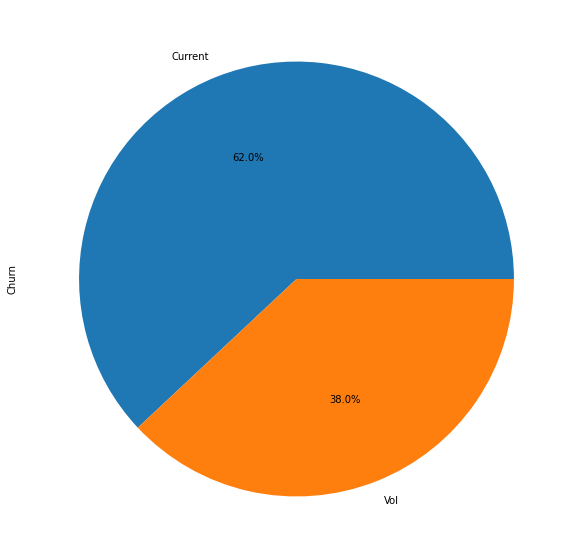

In [ ]:
print(df["Churn"].value_counts())
df["Churn"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

In [ ]:
df[kc]

,ID,Roaming,International,Local,Dropped,Paymethod,LocalPlan,RoamingPlan,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,Overall Satisfaction,Churn
283,529,12.45,0.00,46.42,4,CC,FreeLocal,Standard,M,M,2,53010.80,N,58.87,18.840000,1,Current
287,535,9.65,0.00,6.33,0,CC,Budget,Intnl_discount,M,M,2,20078.00,N,15.98,32.846667,4,Current
292,549,28.92,0.00,45.47,0,CH,Budget,Standard,F,M,0,83891.90,Y,74.40,61.020000,4,Vol
294,552,13.19,0.00,87.09,0,CC,FreeLocal,Standard,F,S,0,28589.10,N,100.28,15.600000,4,Vol
299,564,4.79,0.50,91.04,1,CC,Budget,Standard,F,M,2,67388.00,N,96.33,53.120000,3,Vol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,3808,26.13,0.00,32.88,1,CC,Budget,Standard,M,S,2,96.33,N,59.01,56.473333,1,Current
2065,3821,0.37,0.00,28.66,0,CC,FreeLocal,Standard,F,S,0,78851.30,N,29.04,48.373333,4,Vol
2066,3822,22.17,0.57,13.45,0,Auto,Budget,Standard,F,S,1,17540.70,Y,36.20,62.786667,1,Vol
2067,3823,28.92,0.00,45.47,0,CH,Budget,Standard,F,M,0,83891.90,Y,74.40,61.020000,4,Vol


In [ ]:
df1= df[~kc]

Current    807

Vol        615

Name: Churn, dtype: int64


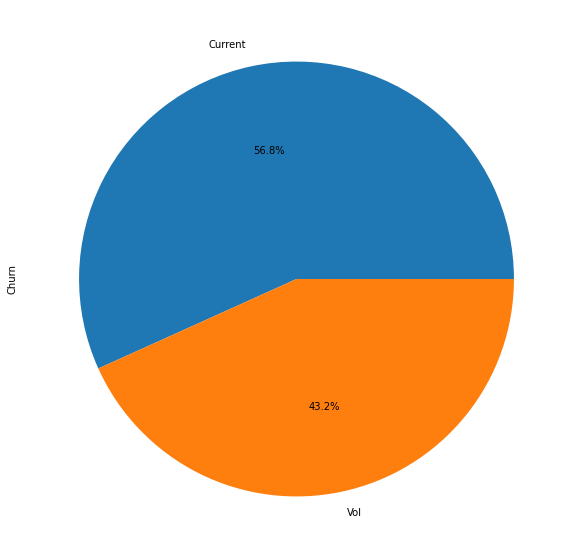

In [ ]:
print(df1["Churn"].value_counts())
df1["Churn"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

In [ ]:
def check_out (df, col) :
  print(f"columns_name : {col}")
  print(df[col].value_counts())
  print("########################################"*2)
  print(f" # null_values: {df[col].isnull().sum()}")

  print("########################################"*2)
  print(f" uniques_values: {df[col].unique()[:10]} ")
  print(f" nun_uniques_values: {df[col].nunique()} ")
  print("*--"*45)

In [ ]:
for col in df1.columns:
  check_out(df1,col)

columns_name : ID

1       1

2218    1

2146    1

2145    1

2144    1

       ..

939     1

938     1

936     1

935     1

3825    1

Name: ID, Length: 1422, dtype: int64

################################################################################

 # null_values: 0

################################################################################

 uniques_values: [ 1  6  8 11 14 17 18 21 22 23] 

 nun_uniques_values: 1422 

*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

columns_name : Roaming

0.00     49

2.00     16

23.56    12

6.08     12

28.42    12

         ..

27.05     1

18.66     1

5.97      1

29.30     1

5.52      1

Name: Roaming, Length: 312, dtype: int64

################################################################################

 # null_values: 0

################################################################################

 uniques_values: [23.56 29.78 2

In [ ]:
df1

,ID,Roaming,International,Local,Dropped,Paymethod,LocalPlan,RoamingPlan,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,Overall Satisfaction,Churn
0,1,23.56,0.0,206.08,0,CC,Budget,Intnl_discount,F,S,1,38000.00,N,229.64,24.393333,3,Current
1,6,29.78,0.0,45.50,0,CH,FreeLocal,Standard,M,M,2,29616.00,N,75.29,49.426667,2,Current
2,8,24.81,0.0,22.44,0,CC,FreeLocal,Standard,M,M,0,19732.80,N,47.25,50.673333,3,Current
3,11,26.13,0.0,32.88,1,CC,Budget,Standard,M,S,2,96.33,N,59.01,56.473333,1,Current
4,14,5.03,0.0,23.11,0,CH,Budget,Intnl_discount,F,M,2,52004.80,N,28.14,25.140000,1,Vol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,3798,0.87,0.0,11.52,0,Auto,FreeLocal,Intnl_discount,M,S,0,90321.60,N,12.39,28.000000,2,Current
2057,3799,18.02,0.0,136.47,0,CC,FreeLocal,Standard,M,D,0,90478.60,N,154.49,54.553333,1,Vol
2058,3800,8.09,0.0,13.74,0,CH,Budget,Standard,F,M,2,56187.00,N,21.83,43.000000,2,Current
2064,3811,5.03,0.0,23.11,0,CH,Budget,Intnl_discount,F,M,2,52004.80,N,28.14,25.140000,3,Current


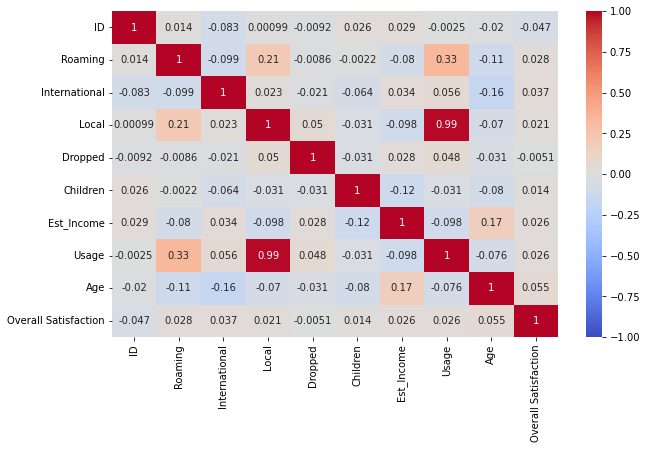

In [ ]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm");

In [ ]:
df[["Local","Usage"]]

,Local,Usage
0,206.08,229.64
1,45.50,75.29
2,22.44,47.25
3,32.88,59.01
4,23.11,28.14
...,...,...
2065,28.66,29.04
2066,13.45,36.20
2067,45.47,74.40
2068,12.46,38.95


In [ ]:
num_col = []
for column in df1:
    if df1[column].dtypes!='object':
        	num_col.append(column) 

In [ ]:
num_col

['ID',
 'Roaming',
 'International',
 'Local',
 'Dropped',
 'Children',
 'Est_Income',
 'Usage',
 'Age',
 'Overall Satisfaction']

In [ ]:
num_col.extend(["Churn"])  

In [ ]:
num_col

['ID',
 'Roaming',
 'International',
 'Local',
 'Dropped',
 'Children',
 'Est_Income',
 'Usage',
 'Age',
 'Overall Satisfaction',
 'Churn',
 'Churn',
 'Churn']

In [ ]:
num_col.pop(0)  

'ID'

In [ ]:
for _ in range(2):
  num_col.pop()

In [ ]:
df_num = df1[num_col]

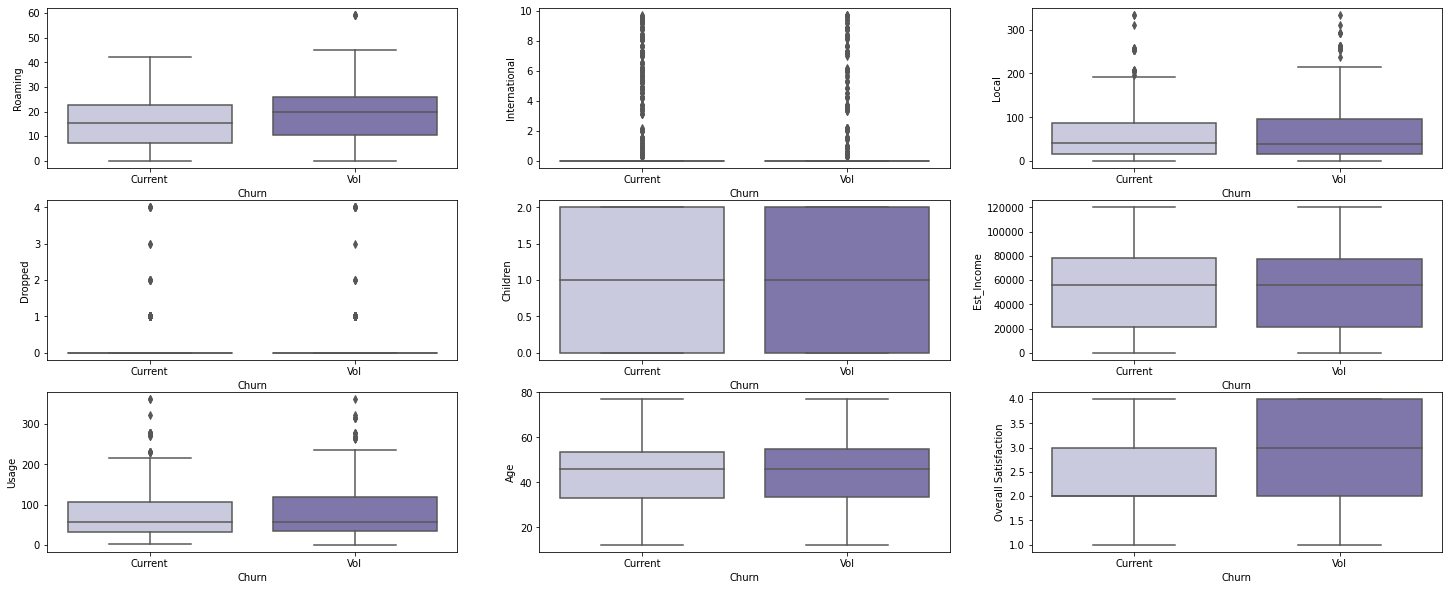

In [ ]:
plt.figure(figsize=(25,10))
for index, feature in enumerate(df_num):
    if feature != "Churn" and feature != "ID" :
        plt.subplot(3, 3, index+1)
        sns.boxplot(x='Churn',palette="Purples",y=feature, data=df_num)

*** When looking to data for columns based on target(churn), 1 and 0 values  look close (curent/vol). 
There is small differences. 
Machine will get difficult to specify them.
This data is not good for classification.

In [ ]:
categ_columns = []
for col in df1.columns:
	if df1[col].dtypes == "object":
		categ_columns.append(col) 
        
print('categ numericals columns are {}'.format(categ_columns))

categ numericals columns are ['Paymethod', 'LocalPlan', 'RoamingPlan', 'Sex', 'Status', 'Car_Owner', 'Churn']


In [ ]:
#pip install matplotlib --upgrade

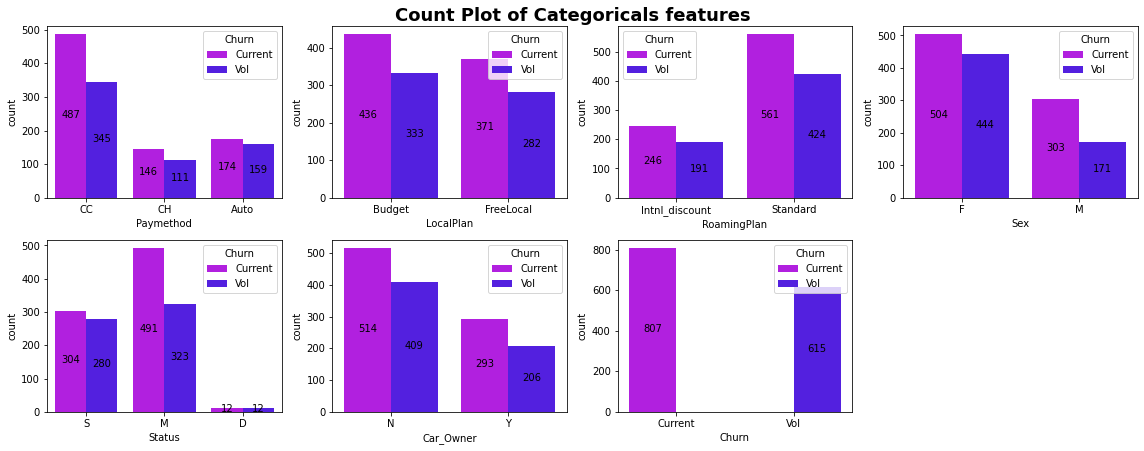

In [ ]:
fig = plt.figure(figsize=[16,15])
fig.suptitle('Count Plot of Categoricals features', fontsize=18, fontweight='bold')
for i , column in enumerate(categ_columns):
   ax = fig.add_subplot(5, 4, i+1);
   ax = sns.countplot(x=column, data=df1, hue="Churn", palette=sns.color_palette("gist_rainbow_r", 10)) 
   for val in ax.containers:
      # set the bar label based on the y-axis
      ax.bar_label(val, label_type='center', padding=1)
plt.tight_layout()

In [ ]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue' , 'forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' ];

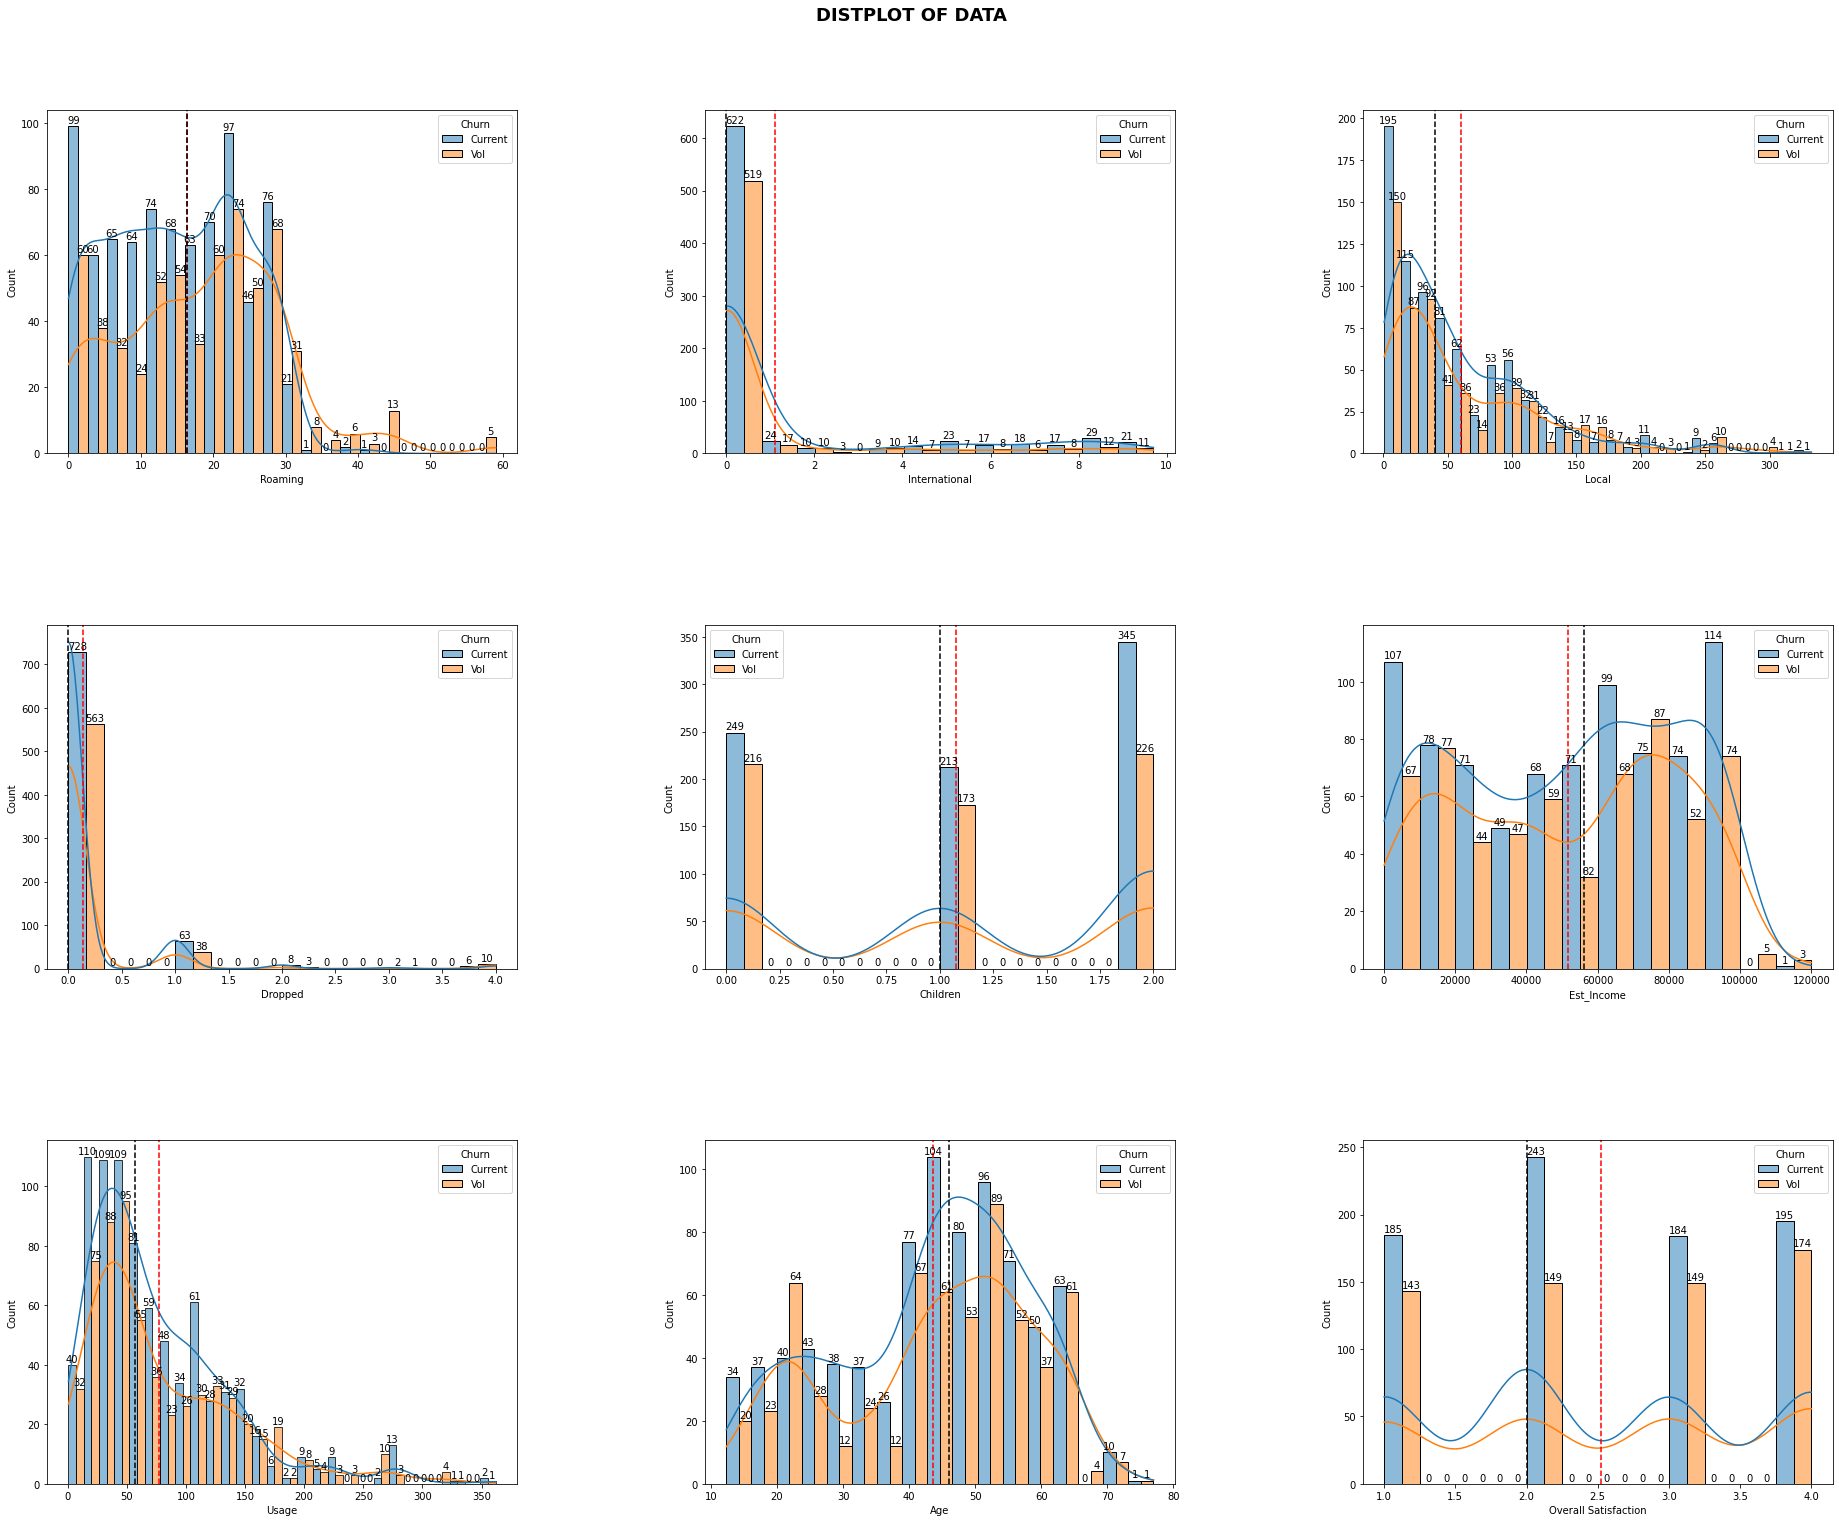

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(num_col[:-1]):
    ax = fig.add_subplot(3, 3, i+1)
    ax = sns.histplot(x=df1[col],
                      color=colours[i],
                      hue=df1["Churn"],
                      kde=True, 
                      multiple="dodge")
    for val in ax.containers:
      
      ax.bar_label(val, label_type='edge', padding=1)
    
    ax.axvline(df1[col].mean(),color='red',linestyle='--')
    ax.axvline(df1[col].median(),color='black',linestyle='--')
  

*** Density of distrubition for each column based on target values.
You can see outliers based on target values.

*** you can use swarmplot also bu it will take mauch time to draw

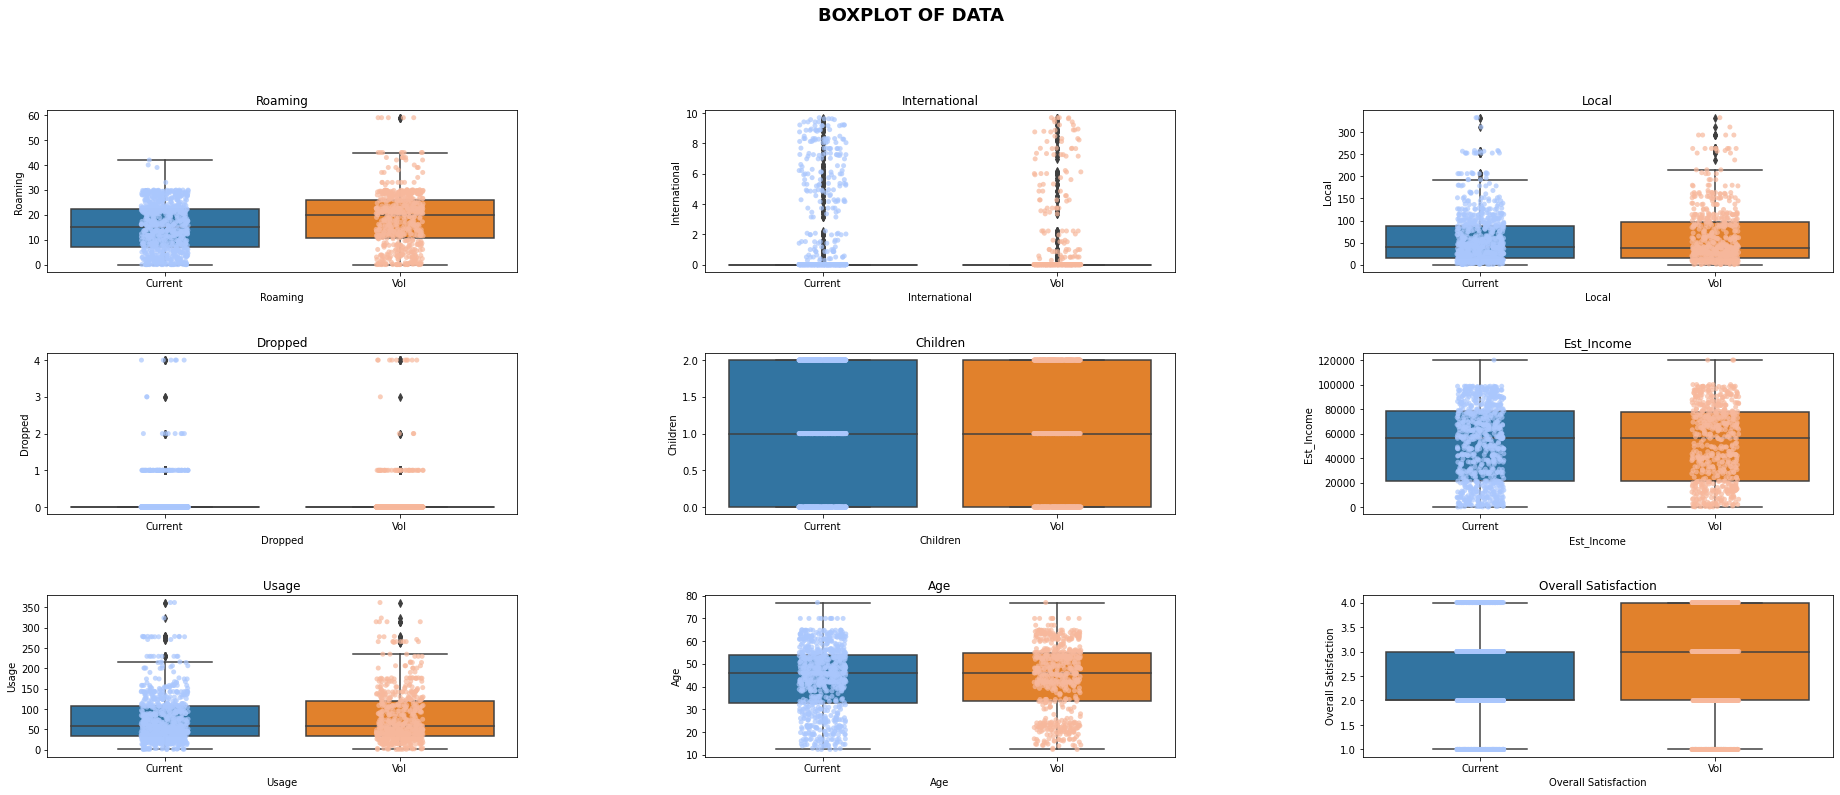

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(num_col[:-1]):  
    ax = fig.add_subplot(6,3, i+1);
    ax = sns.boxplot(data=df1, 
                     y=col,
                     x="Churn");
    ax = sns.stripplot(data=df1,   
                       y=col,
                       x="Churn",
                       alpha=0.7,
                       palette="coolwarm") 
    ax.set_title(f'{col}') 
    ax.set_xlabel(f'{col}')

*** Distribution of each feature 
checking outliers
For example international is so less so a small step seems outlier but it is not.

# feature engineering

*** 
- Age     : We can divide in to 4 bins of age.
- Roaming : 0 to median =0 ,median to 30 = 1,rst =2
- Estimated income : We can split 3 income levels
- International : not_used = 0, used > 0
- Dropped : not_dropped = 0, dropped >0


In [ ]:
%%time
df1.columns.to_series().apply(lambda col: col.lower().strip().replace(" ", "_"))

CPU times: user 941 µs, sys: 0 ns, total: 941 µs

Wall time: 953 µs


ID                                        id
Roaming                              roaming
International                  international
Local                                  local
Dropped                              dropped
Paymethod                          paymethod
LocalPlan                          localplan
RoamingPlan                      roamingplan
Sex                                      sex
Status                                status
Children                            children
Est_Income                        est_income
Car_Owner                          car_owner
Usage                                  usage
Age                                      age
Overall Satisfaction    overall_satisfaction
Churn                                  churn
dtype: object

In [ ]:
df1.roaming

0       23.56
1       29.78
2       24.81
3       26.13
4        5.03
        ...  
2056     0.87
2057    18.02
2058     8.09
2064     5.03
2069    13.19
Name: roaming, Length: 1422, dtype: float64

In [ ]:
#  genaral function for all. 
def bin_formatter(df, col, first, second , third):
  result = []
  for value in df[col]:
    if value < first:
      result.append(0)
    elif value < second:
      result.append(1)
    elif value <= third:
      result.append(2)
    else:
      result.append(3)
  return pd.Series(result, index=df[col].index)

In [ ]:
bin_formatter(df1,"roaming", df1.roaming.median(), 30,df1.roaming.max()).value_counts()

0    708
1    667
2     47
dtype: int64

In [ ]:
bin_formatter(df1,"age", 23, 39, 65).value_counts()

2    961
1    235
0    203
3     23
dtype: int64

Generation,2021 Debt,Number of Cards
Generation Z (18-23),$2312,1.7
Millennials (24-39),$4569,2.7
Generation X (40-55),$7236,3.3
Baby boomers (56-74),$6230,3.4
Silent generation (75+),$3821,2.7


In [ ]:
pd.read_csv("age.txt")

,Generation,2021 Debt,Number of Cards
0,Generation Z (18-23),$2312,1.7
1,Millennials (24-39),$4569,2.7
2,Generation X (40-55),$7236,3.3
3,Baby boomers (56-74),$6230,3.4
4,Silent generation (75+),$3821,2.7


35k , 85k income thresholds

In [ ]:
bin_col = ["age", "roaming", "est_income"]

for col in bin_col:
  if col == "age":
    df1.age = bin_formatter(df1,"age", 23, 39, 65)
  elif col == "roaming":
    df1.roaming = bin_formatter(df1,"roaming", df1.roaming.median(), 30, df1.roaming.max())
  else:
    df1.est_income = bin_formatter(df1,"est_income", 35_000, 85_000, df1.est_income.max())

In [ ]:
df1.dropped.map(lambda x: "dropped" if x>0 else "not_dropped")

0       not_dropped
1       not_dropped
2       not_dropped
3           dropped
4       not_dropped
           ...     
2056    not_dropped
2057    not_dropped
2058    not_dropped
2064    not_dropped
2069    not_dropped
Name: dropped, Length: 1422, dtype: object

In [ ]:
df1.international.map(lambda x: "used" if x>0 else "not_used").value_counts()

not_used    1112
used         310
Name: international, dtype: int64

In [ ]:
bool_col = ["dropped", "international"]

for col in bool_col:
  if col == "dropped":
    df1.dropped = df1.dropped.map(lambda x: "dropped" if x>0 else "not_dropped")
  else:
    df1.international = df1.international.map(lambda x: "used" if x>0 else "not_used")



In [ ]:
df1

,id,roaming,international,local,dropped,paymethod,localplan,roamingplan,sex,status,children,est_income,car_owner,usage,age,overall_satisfaction,churn
0,1,1,not_used,206.08,not_dropped,CC,Budget,Intnl_discount,F,S,1,1,N,229.64,1,3,Current
1,6,1,not_used,45.50,not_dropped,CH,FreeLocal,Standard,M,M,2,0,N,75.29,2,2,Current
2,8,1,not_used,22.44,not_dropped,CC,FreeLocal,Standard,M,M,0,0,N,47.25,2,3,Current
3,11,1,not_used,32.88,dropped,CC,Budget,Standard,M,S,2,0,N,59.01,2,1,Current
4,14,0,not_used,23.11,not_dropped,CH,Budget,Intnl_discount,F,M,2,1,N,28.14,1,1,Vol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,3798,0,not_used,11.52,not_dropped,Auto,FreeLocal,Intnl_discount,M,S,0,2,N,12.39,1,2,Current
2057,3799,1,not_used,136.47,not_dropped,CC,FreeLocal,Standard,M,D,0,2,N,154.49,2,1,Vol
2058,3800,0,not_used,13.74,not_dropped,CH,Budget,Standard,F,M,2,1,N,21.83,2,2,Current
2064,3811,0,not_used,23.11,not_dropped,CH,Budget,Intnl_discount,F,M,2,1,N,28.14,1,3,Current


In [ ]:
df1.drop(columns=['id'], inplace=True)

In [ ]:
df1.columns

Index(['roaming', 'international', 'local', 'dropped', 'paymethod',
       'localplan', 'roamingplan', 'sex', 'status', 'children', 'est_income',
       'car_owner', 'usage', 'age', 'overall_satisfaction', 'churn'],
      dtype='object')

In [ ]:
df1.est_income.value_counts(dropna=False)

1    691
0    482
2    249
Name: est_income, dtype: int64

In [ ]:
df1.corr()

,roaming,local,children,est_income,usage,age,overall_satisfaction
roaming,1.000000,0.235752,0.004824,-0.066984,0.323658,-0.217471,0.039977
local,0.235752,1.000000,-0.023436,-0.060750,0.988666,-0.114226,0.012164
children,0.004824,-0.023436,1.000000,-0.122790,-0.022242,-0.017552,0.015374
est_income,-0.066984,-0.060750,-0.122790,1.000000,-0.062262,0.153981,0.014303
usage,0.323658,0.988666,-0.022242,-0.062262,1.000000,-0.126897,0.016217
age,-0.217471,-0.114226,-0.017552,0.153981,-0.126897,1.000000,0.034554
overall_satisfaction,0.039977,0.012164,0.015374,0.014303,0.016217,0.034554,1.000000


In [ ]:
enc = {"Vol":1, "Current":0}  
df1["churn"] = df1["churn"].replace(enc)

In [ ]:
df1.churn.value_counts()

0    807
1    615
Name: churn, dtype: int64

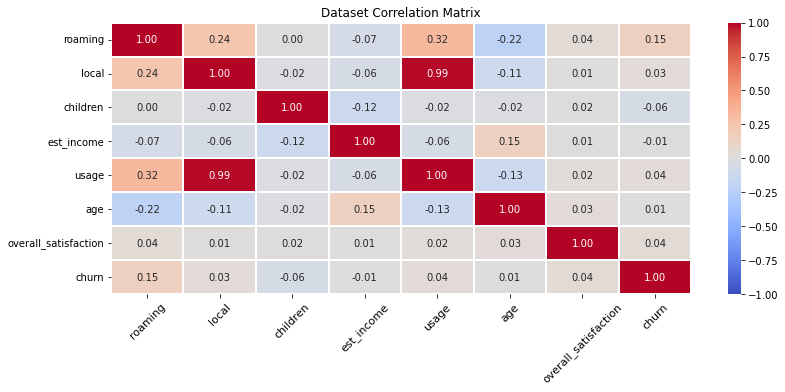

In [ ]:
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(df1.corr(), ax=ax, vmin=-1, vmax=1, annot=True, linewidths=0.05, fmt= '.2f',cmap='coolwarm')
ax.tick_params(axis='x', which='major', labelsize=11, rotation=45)
ax.set_title('Dataset Correlation Matrix')
fig.show() 

In [ ]:
df1.to_csv("ready_to_model.csv", index=False)

# Data Pre-Processing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/content/ready_to_model.csv")
data

,roaming,international,local,dropped,paymethod,localplan,roamingplan,sex,status,children,est_income,car_owner,usage,age,overall_satisfaction,churn
0,1,not_used,206.08,not_dropped,CC,Budget,Intnl_discount,F,S,1,1,N,229.64,1,3,0
1,1,not_used,45.50,not_dropped,CH,FreeLocal,Standard,M,M,2,0,N,75.29,2,2,0
2,1,not_used,22.44,not_dropped,CC,FreeLocal,Standard,M,M,0,0,N,47.25,2,3,0
3,1,not_used,32.88,dropped,CC,Budget,Standard,M,S,2,0,N,59.01,2,1,0
4,0,not_used,23.11,not_dropped,CH,Budget,Intnl_discount,F,M,2,1,N,28.14,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,0,not_used,11.52,not_dropped,Auto,FreeLocal,Intnl_discount,M,S,0,2,N,12.39,1,2,0
1418,1,not_used,136.47,not_dropped,CC,FreeLocal,Standard,M,D,0,2,N,154.49,2,1,1
1419,0,not_used,13.74,not_dropped,CH,Budget,Standard,F,M,2,1,N,21.83,2,2,0
1420,0,not_used,23.11,not_dropped,CH,Budget,Intnl_discount,F,M,2,1,N,28.14,1,3,0


In [ ]:
data, predict = \
              np.split(data.sample(frac=1, random_state=42), 
                       [int(.95*len(data))])

In [ ]:
X = data.drop("churn", axis=1)
y = data.churn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
cate_cols = X.select_dtypes(include="O").columns
cate_cols

Index(['international', 'dropped', 'paymethod', 'localplan', 'roamingplan',
       'sex', 'status', 'car_owner'],
      dtype='object')

*** Using pipeline will keep data lekage.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False,drop="if_binary"), cate_cols), 
                                        remainder= MinMaxScaler()) 

# Modelling

In [ ]:
def model_scorer(model, X_train, y_train, X_test, y_test):
    """ take predictions from model and calculates the scores for train and the
        test sets.
    """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
pip install pandas-illustrated

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/














     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.1 MB/s eta 0:00:00
















## Logistic Regression

In [ ]:
operations = [("preprocessor", column_trans), ("Log_model", LogisticRegression(random_state=42))]
pipe_model = Pipeline(steps=operations)

In [ ]:
pipe_model.fit(X_train, y_train)
model_scorer(pipe_model, X_train, y_train, X_test, y_test)

,train_set,test_set
Accuracy,0.600000,0.633333
Precision,0.571429,0.650000
Recall,0.291845,0.333333
f1,0.386364,0.440678


In [ ]:
scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores
df_scores.mean()[2:]

test_accuracy      0.571296
train_accuracy     0.601955
test_precision     0.521611
train_precision    0.575068
test_recall        0.259621
train_recall       0.294224
test_f1            0.342230
train_f1           0.388550
dtype: float64

In [ ]:
operations = [("preprocessor", column_trans), ("logm", LogisticRegression(class_weight="balanced", random_state = 42))]
pipe_model_log_grid = Pipeline(steps=operations)

In [ ]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
solver = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

param_grid = {"logm__penalty" : penalty,
             "logm__l1_ratio" : l1_ratio,
             "logm__C" : C,
             "logm__solver" : solver
             }

***https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html

In [ ]:
grid_log_model = HalvingRandomSearchCV(pipe_model_log_grid, param_distributions=param_grid, scoring="recall", cv=10, n_jobs=-1)

In [ ]:
grid_log_model.fit(X_train,y_train)

HalvingRandomSearchCV(cv=10,
                      estimator=Pipeline(steps=[('preprocessor',
                                                 ColumnTransformer(remainder=MinMaxScaler(),
                                                                   transformers=[('onehotencoder',
                                                                                  OneHotEncoder(drop='first',
                                                                                                handle_unknown='ignore',
                                                                                                sparse=False),
                                                                                  Index(['international', 'dropped', 'paymethod', 'localplan', 'roamingplan',
       'sex', 'status', 'car_owner'],
      dtype='object'))])),
                                                ('logm',
                                                 LogisticRegres...
                                           'logm__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                                           'logm__penalty': ['l1', 'l2',
                                                             'elasticnet'],
                                           'logm__solver': ['lbfgs',
                                                            'liblinear',
                                                            'newton-cg',
                                                            'newton-cholesky',
                                                            'sag', 'saga']},
                      scoring='recall')

In [ ]:
grid_log_model.best_params_

{'logm__solver': 'saga',
 'logm__penalty': 'l2',
 'logm__l1_ratio': 0.5263157894736842,
 'logm__C': 1438.449888287663}

In [ ]:
pd.DataFrame(grid_log_model.cv_results_).loc[grid_log_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.510962
mean_train_score    0.556272
Name: 39, dtype: object

In [ ]:
eval_metric(grid_log_model, X_train, y_train, X_test, y_test)

Test_Set

[[95 58]

 [51 66]]

              precision    recall  f1-score   support



           0       0.65      0.62      0.64       153

           1       0.53      0.56      0.55       117



    accuracy                           0.60       270

   macro avg       0.59      0.59      0.59       270

weighted avg       0.60      0.60      0.60       270





Train_Set

[[358 256]

 [210 256]]

              precision    recall  f1-score   support



           0       0.63      0.58      0.61       614

           1       0.50      0.55      0.52       466



    accuracy                           0.57      1080

   macro avg       0.57      0.57      0.56      1080

weighted avg       0.57      0.57      0.57      1080




In [ ]:
log_scores = model_scorer(grid_log_model, X_train, y_train, X_test, y_test)
log_scores

,train_set,test_set
Accuracy,0.568519,0.596296
Precision,0.500000,0.532258
Recall,0.549356,0.564103
f1,0.523517,0.547718


In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




















In [ ]:
from scikitplot.metrics import  plot_confusion_matrix, plot_roc,plot_precision_recall

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

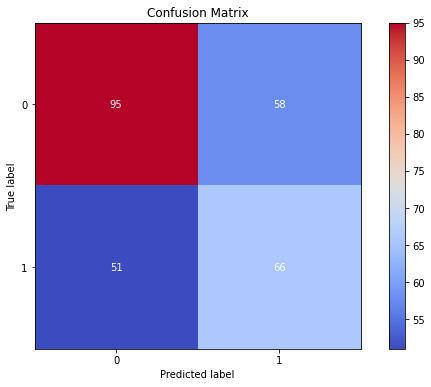

In [ ]:
y_pred = grid_log_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred, normalize=False, cmap="coolwarm")

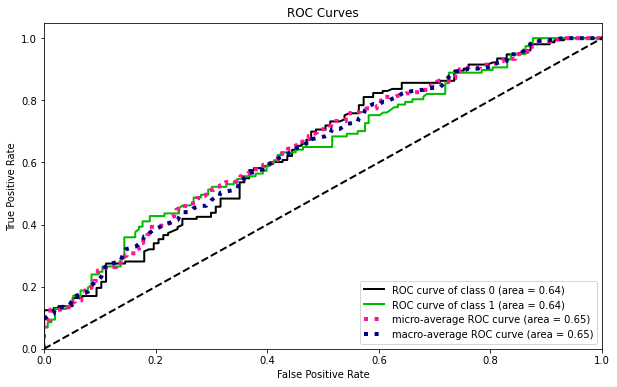

In [ ]:
y_probas = grid_log_model.predict_proba(X_test)
plot_roc(y_test, y_probas);

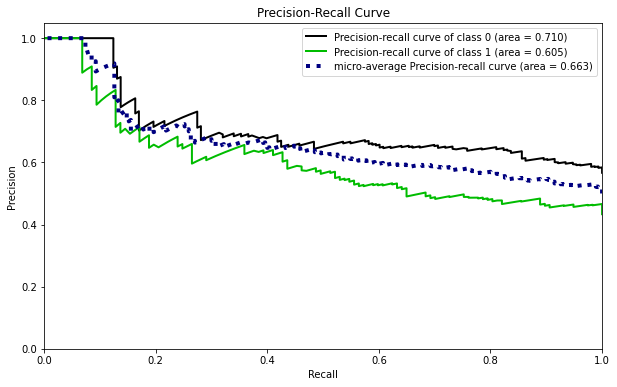

In [ ]:
plot_precision_recall(y_test, y_probas);

In [ ]:
log_scores["test_set"][2]

0.5641025641025641

# Xg_Boost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
column_trans = make_column_transformer((OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cate_cols), 
                                        remainder= MinMaxScaler()) 

In [ ]:
operations = [("preprocessor", column_trans), ("Xgboost", XGBClassifier(random_state=42))]
pipe_model_Xgboost = Pipeline(steps=operations)

In [ ]:
pipe_model_Xgboost.fit(X_train, y_train)
model_scorer(pipe_model_Xgboost ,X_train, y_train, X_test, y_test)

,train_set,test_set
Accuracy,0.837037,0.477778
Precision,0.864322,0.380000
Recall,0.738197,0.324786
f1,0.796296,0.350230


In [ ]:
xgb_params = {'Xgboost__n_estimators':[50, 100, 200],
             'Xgboost__learning_rate': np.linspace(.01, .2, 15),
             'Xgboost__min_child_weight' : [2],
             'Xgboost__max_depth':[2],
             'Xgboost__subsample': [.8, .7, .9],
             'Xgboost__gamma': np.linspace(.1, 1.5, 15),
             'Xgboost__colsample_bytree':  [.5, .7],
             'Xgboost__reg_alpha' : np.linspace(1, 15, 15), 
             'Xgboost__reg_lambda' : np.linspace(1, 13, 15)}

In [ ]:
operations = [("preprocessor", column_trans), ("Xgboost", XGBClassifier(random_state=42))]
pipe_model_Xgboost = Pipeline(steps=operations)

xgb_grid_model = HalvingRandomSearchCV(pipe_model_Xgboost, 
                                     xgb_params, 
                                     scoring="f1",
                                     cv = 10,
                                     n_jobs = -1,
                                     verbose = 2).fit(X_train, y_train)

n_iterations: 4

n_required_iterations: 4

n_possible_iterations: 4

min_resources_: 40

max_resources_: 1080

aggressive_elimination: False

factor: 3

----------

iter: 0

n_candidates: 27

n_resources: 40

Fitting 10 folds for each of 27 candidates, totalling 270 fits

----------

iter: 1

n_candidates: 9

n_resources: 120

Fitting 10 folds for each of 9 candidates, totalling 90 fits

----------

iter: 2

n_candidates: 3

n_resources: 360

Fitting 10 folds for each of 3 candidates, totalling 30 fits

----------

iter: 3

n_candidates: 1

n_resources: 1080

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [ ]:
xgb_grid_model.best_params_

{'Xgboost__subsample': 0.9,
 'Xgboost__reg_lambda': 12.142857142857142,
 'Xgboost__reg_alpha': 1.0,
 'Xgboost__n_estimators': 50,
 'Xgboost__min_child_weight': 2,
 'Xgboost__max_depth': 2,
 'Xgboost__learning_rate': 0.11857142857142856,
 'Xgboost__gamma': 0.7,
 'Xgboost__colsample_bytree': 0.5}

In [ ]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.275835
mean_train_score    0.342277
Name: 39, dtype: object

In [ ]:
xgb_scores = model_scorer(xgb_grid_model, X_train, y_train, X_test, y_test)
xgb_scores

,train_set,test_set
Accuracy,0.630556,0.603704
Precision,0.741007,0.647059
Recall,0.221030,0.188034
f1,0.340496,0.291391


In [ ]:
len((xgb_grid_model.predict_proba(X_train)[:,1] > 0.3).astype("int32"))


1080

In [ ]:
score_dict = {"Train_f1": [],
              "Test_f1": [],
              "Train_recall": [],
              "Test_recall": [],
              "Train_precision": [],
              "Test_precision": [],
              "Train_acc": [],
              "Test_acc": []}
for threshold in np.linspace(0.25, 1, 76):
    pred = (xgb_grid_model.predict_proba(X_train)[:,1] > threshold).astype("int32")
    score_dict["Train_f1"].append(f1_score(y_train, pred))
    score_dict["Train_recall"].append(recall_score(y_train, pred))
    score_dict["Train_precision"].append(precision_score(y_train, pred))
    score_dict["Train_acc"].append(accuracy_score(y_train, pred))
    
    pred1 = (xgb_grid_model.predict_proba(X_test)[:,1] > threshold).astype("int32")
    score_dict["Test_f1"].append(f1_score(y_test, pred1))
    score_dict["Test_recall"].append(recall_score(y_test, pred1))
    score_dict["Test_precision"].append(precision_score(y_test, pred1))
    score_dict["Test_acc"].append(accuracy_score(y_test, pred1))
   

In [ ]:
thrs_df = pd.DataFrame(score_dict, index=np.linspace(0.25, 1, 76)).sort_values("Train_recall")
thrs_df.tail(40)

,Train_f1,Test_f1,Train_recall,Test_recall,Train_precision,Test_precision,Train_acc,Test_acc
0.64,0.124000,0.170543,0.066524,0.094017,0.911765,0.916667,0.594444,0.603704
0.63,0.124000,0.170543,0.066524,0.094017,0.911765,0.916667,0.594444,0.603704
0.62,0.124000,0.170543,0.066524,0.094017,0.911765,0.916667,0.594444,0.603704
0.60,0.127490,0.170543,0.068670,0.094017,0.888889,0.916667,0.594444,0.603704
0.61,0.127490,0.170543,0.068670,0.094017,0.888889,0.916667,0.594444,0.603704
0.59,0.127490,0.170543,0.068670,0.094017,0.888889,0.916667,0.594444,0.603704
0.58,0.142012,0.196970,0.077253,0.111111,0.878049,0.866667,0.597222,0.607407
0.57,0.142012,0.196970,0.077253,0.111111,0.878049,0.866667,0.597222,0.607407
0.56,0.148728,0.208955,0.081545,0.119658,0.844444,0.823529,0.597222,0.607407
0.55,0.158915,0.207407,0.087983,0.119658,0.820000,0.777778,0.598148,0.603704


In [ ]:
filter = thrs_df["Train_recall"]*.9 < thrs_df["Test_recall"]
filter

1.00    False
0.82    False
0.83    False
0.84    False
0.85    False
        ...  
0.29     True
0.28     True
0.27     True
0.26     True
0.25     True
Length: 76, dtype: bool

In [ ]:
thrs_df[filter].sort_values(by="Test_recall", ascending=False)

,Train_f1,Test_f1,Train_recall,Test_recall,Train_precision,Test_precision,Train_acc,Test_acc
0.25,0.602846,0.604651,1.000000,1.000000,0.431481,0.433333,0.431481,0.433333
0.26,0.602846,0.604651,1.000000,1.000000,0.431481,0.433333,0.431481,0.433333
0.27,0.603504,0.609375,0.997854,1.000000,0.432558,0.438202,0.434259,0.444444
0.28,0.604681,0.609375,0.997854,1.000000,0.433769,0.438202,0.437037,0.444444
0.29,0.607728,0.608924,0.995708,0.991453,0.437323,0.439394,0.445370,0.448148
0.30,0.611001,0.614973,0.989270,0.982906,0.441994,0.447471,0.456481,0.466667
0.31,0.613530,0.611570,0.982833,0.948718,0.445959,0.451220,0.465741,0.477778
0.32,0.617368,0.619718,0.976395,0.940171,0.451389,0.462185,0.477778,0.500000
0.33,0.618884,0.618911,0.963519,0.923077,0.455838,0.465517,0.487963,0.507407
0.34,0.626420,0.609971,0.946352,0.888889,0.468153,0.464286,0.512963,0.507407


*** 0.39 is selected as threshold for optimal recall and precision score for class 1 and accuracy.

{'Xgboost__subsample': 0.9,
 'Xgboost__reg_lambda': 12.142857142857142,
 'Xgboost__reg_alpha': 1.0,
 'Xgboost__n_estimators': 50,
 'Xgboost__min_child_weight': 2,
 'Xgboost__max_depth': 2,
 'Xgboost__learning_rate': 0.11857142857142856,
 'Xgboost__gamma': 0.7,
 'Xgboost__colsample_bytree': 0.5} => 0.39 threslhold
 - 0.615512	0.604027	0.800429	0.769231	0.500000	0.497238	0.568519	0.562963

In [ ]:
xgb_grid_model.best_params_

{'Xgboost__subsample': 0.9,
 'Xgboost__reg_lambda': 12.142857142857142,
 'Xgboost__reg_alpha': 1.0,
 'Xgboost__n_estimators': 50,
 'Xgboost__min_child_weight': 2,
 'Xgboost__max_depth': 2,
 'Xgboost__learning_rate': 0.11857142857142856,
 'Xgboost__gamma': 0.7,
 'Xgboost__colsample_bytree': 0.5}

In [ ]:
operations = [("preprocessor", column_trans), ("Xgboost", XGBClassifier(random_state=42))]
pipe_model_Xgboost = Pipeline(steps=operations)

In [ ]:
final_model = pipe_model_Xgboost.set_params(**xgb_grid_model.best_params_)

In [ ]:
final_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['international', 'dropped', 'paymethod', 'localplan', 'roamingplan',
       'sex', 'status', 'car_owner'],
      dtype='object'))])),
                ('Xgboost',
                 XGBClassifier(base_score=None, booster=None, ca...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.11857142857142856, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=2,
                               max_leaves=None, min_child_weight=2, missing=nan,
                               monotone_constraints=None, n_estimators=50,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

In [ ]:
np.argmax(final_model.predict_proba(predict), axis=1) # .5 threshold

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
pred = (final_model.predict_proba(predict)[:,1] > .39).astype("int32")
pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1], dtype=int32)

In [ ]:
real = predict["churn"].values
real

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1])

*** Final model we build gave same performance on the unseen data but not sufficient for the deployment 

In [ ]:
pd.crosstab(real, pred)   

col_0,0,1
row_0,,
0,13,27
1,7,25


In [ ]:
final_model.steps[1][1].feature_importances_

array([0.06025158, 0.04618955, 0.08908905, 0.        , 0.0514622 ,
       0.10344962, 0.12315629, 0.03395355, 0.15184663, 0.07779658,
       0.06533432, 0.        , 0.06821334, 0.06826536, 0.06099187],
      dtype=float32)

In [ ]:
feats = pd.DataFrame(index=X.columns, data=final_model.steps[1][1].feature_importances_, columns=["Feature Importance"])
XGB_feature_imp = feats.sort_values("Feature Importance", ascending=False)

XGB_feature_imp 

,Feature Importance
status,0.151847
roamingplan,0.123156
localplan,0.103450
local,0.089089
children,0.077797
age,0.068265
usage,0.068213
est_income,0.065334
overall_satisfaction,0.060992
roaming,0.060252


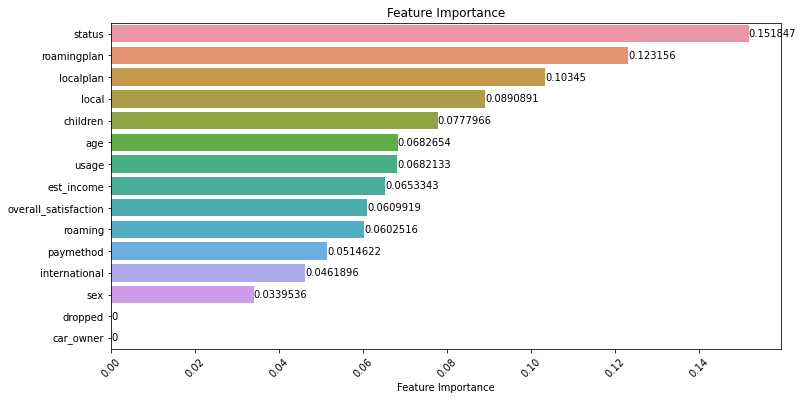

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=XGB_feature_imp["Feature Importance"], y=XGB_feature_imp.index)
ax.bar_label(ax.containers[0])
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

# # # 